In [2]:
%load_ext autoreload
%autoreload 2

import torch
from pytorch3d.io import load_objs_as_meshes
from pytorch3d.structures import Meshes
from pytorch3d.renderer import CamerasBase

from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map

In [3]:
device = torch.device("cuda")
meshes = load_objs_as_meshes(["data/meshes/mixamo-human.obj"], device=device)


def mesh_views(mesh: Meshes, cameras: CamerasBase):
    frames = meshes.extend(len(cameras))
    depth_maps = render_depth_map(frames, cameras, resolution=100)
    display_ims(depth_maps)

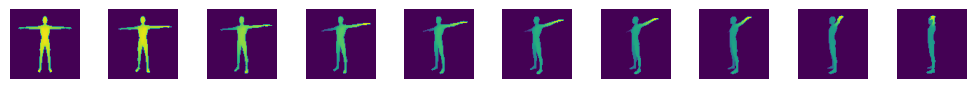

In [9]:
from text3d2video.camera_placement import turntable_cameras

cameras = turntable_cameras(10, dist=2, start_angle=0, stop_angle=90, device=device)

mesh_views(meshes, cameras)

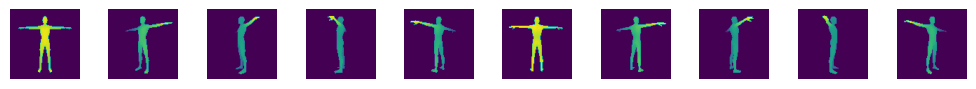

In [35]:
from text3d2video.camera_placement import turntable_loop_cameras

cameras = turntable_loop_cameras(10, dist=2, device=device)

mesh_views(meshes, cameras)

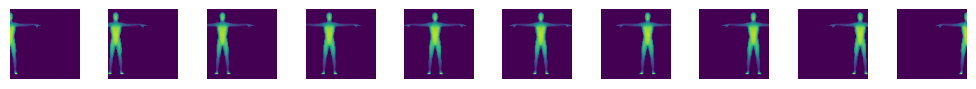

In [ ]:
from text3d2video.camera_placement import sideways_orthographic_cameras

cameras = sideways_orthographic_cameras(1, -1, 10)
mesh_views(meshes, cameras)

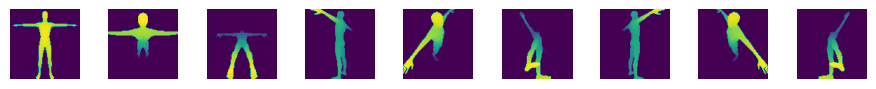

In [9]:
from text3d2video.camera_placement import multiview_cameras


cameras = multiview_cameras(meshes, 10, device=device)
mesh_views(meshes, cameras)

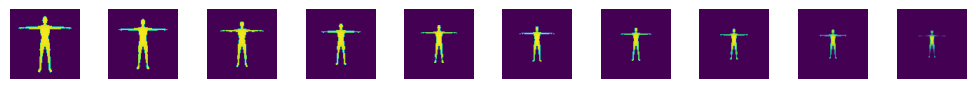

In [3]:
from text3d2video.camera_placement import z_movement_cameras

cameras = z_movement_cameras(device=device)
mesh_views(meshes, cameras)

In [ ]:
n = 10
angles = torch.linspace(0, 360, n+1)[0:-1]

tensor(72.)